# Homework 1

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.linear_model import LinearRegression

print(tf.__version__)

2.18.0


# Use this random one dimensional dataset

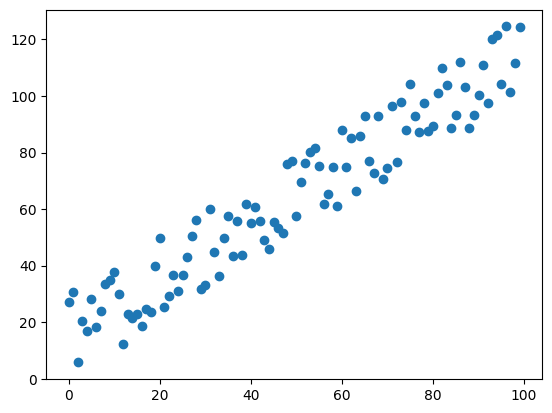

In [2]:
x = np.arange(0,100)
y = x + np.random.rand(100) * 30
plt.scatter(x,y)
plt.show()

# Problem 1
### a) Fit a regression line on the dataset created above using sklearn.linear_model LinearRegression, use default hyperparameters
### b) Print out the regression intercept and coefficients
### c) Plot the data in blue and the regression line in red
### d) Predict the y value for x=45 and show it on the plot in green

Y-Intercept: 14.84
Coefficient: 1.01
Predicted y value for x=45: 60.10


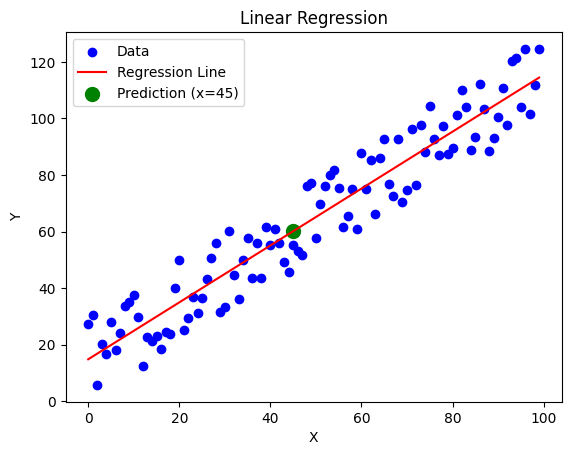

In [13]:
X = x.reshape(-1, 1)  

# a.) Fit regression line with default hyperparams
sklearn_lr_model = LinearRegression() # with default params
sklearn_lr_model.fit(X, y)

# b.) Print out the regression intercept and coefficients
print(f"Y-Intercept: {sklearn_lr_model.intercept_:.2f}")
print(f"Coefficient: {sklearn_lr_model.coef_[0]:.2f}")

# c) Plot the data in blue and the regression line in red
fig, ax = plt.subplots()
ax.scatter(x, y, color='blue', label='Data')
ax.plot(x, sklearn_lr_model.predict(X), color='red', label='Regression Line')

# d) Predict the y value for x=45 and show it on the plot in green
x_pred = 45
y_pred = sklearn_lr_model.predict([[x_pred]])[0]
print(f"Predicted y value for x=45: {y_pred:.2f}")
ax.scatter(x_pred, y_pred, color='green', s=100, label=f'Prediction (x={x_pred})')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Linear Regression')
ax.legend()

plt.show()

# Problem 2
### a) Fit a regression line on the dataset created above using tensorflow and keras, use default hyperparameters, sequential model, one dense neuron, activation='linear'.  Use 'rmsprop' optimizer and mean squared error for the loss function.  Use 1000 epochs.
### b) Print out the regression intercept and coefficients
### c) Plot the data in blue and the regression line in red
### d) Predict the y value for x=45 and show it on the plot in green
### e) Print the coefficients in the keras model and compare to the scikit learn modelen


/Users/jairusmartinez/Library/CloudStorage/OneDrive-UniversityofDenver/UniversityOfDenver/COMP4531/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Keras Intercept: 2.98
Keras Coefficient: 1.18
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


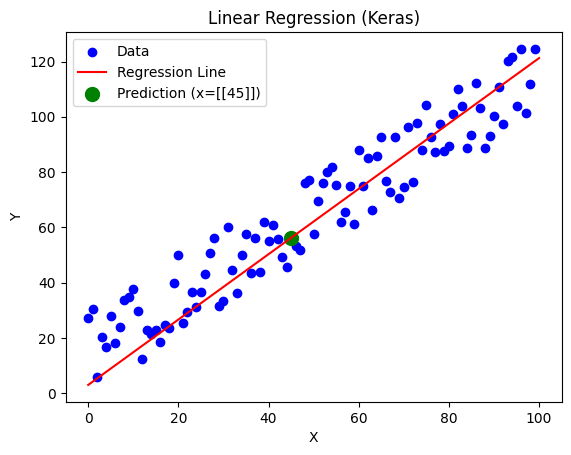

Predicted y value for x=45: 56.20

Comparison of coefficients:
Keras - Intercept: 2.9767, Coefficient: 1.1827
Scikit-learn - Intercept: 14.8366, Coefficient: 1.0059


In [ ]:
# a) Fit a regression line using TensorFlow and Keras
keras_lr_model = keras.Sequential([
    keras.layers.Dense(1, activation='linear', input_shape=(1,))
])

keras_lr_model.compile(optimizer='rmsprop', loss='mean_squared_error')
keras_lr_model.fit(x, y, epochs=1000, verbose=0)

# b) Print out the regression intercept and coefficients
weights = keras_lr_model.get_weights()
keras_lr_intercept = weights[1][0]
keras_lr_coefficient = weights[0][0][0]
print(f"Keras Intercept: {keras_lr_intercept:.2f}")
print(f"Keras Coefficient: {keras_lr_coefficient:.2f}")

# c) and d) Plot the data, regression line, and prediction
fig, ax = plt.subplots()

ax.scatter(x, y, color='blue', label='Data')

x_line = np.linspace(0, 100, 100).reshape(-1, 1)
y_pred_line = keras_lr_model.predict(x_line)
ax.plot(x_line, y_pred_line, color='red', label='Regression Line')

x_pred = np.array([[45]]) 
y_pred = keras_lr_model.predict(x_pred)[0][0]
ax.scatter(x_pred, y_pred, color='green', s=100, label=f'Prediction (x={x_pred})')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Linear Regression (Keras)')
ax.legend()

plt.show()

print(f"Predicted y value for x=45: {y_pred:.2f}")

# e) Compare Keras coefficients with scikit-learn model
print("\nComparison of coefficients:")
print(f"Keras - Intercept: {keras_lr_intercept:.4f}, Coefficient: {keras_lr_coefficient:.4f}")
print(f"Scikit-learn - Intercept: {sklearn_lr_model.intercept_:.4f}, Coefficient: {sklearn_lr_model.coef_[0]:.4f}")